In [ ]:
# class imbalanced >> when one class has higher percentage
# handle :
# upsampling
# downsampling
# SMOTE

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0) # for reproducibility of result
no_samples=1000
class_0_ration=0.9
no_class_0=int(no_samples*class_0_ration)
no_class_1=100


In [3]:
no_class_0,no_class_1

(900, 100)

In [4]:
class_0={'feature1':np.random.normal(0,1,no_class_0),
         'feature2':np.random.normal(0,1,no_class_0),
         'target':[0]*no_class_0
         }

In [6]:
class_0=pd.DataFrame(class_0)

In [7]:
class_0

,feature1,feature2,target
0,1.764052,-1.461733,0
1,0.400157,-0.683440,0
2,0.978738,0.367545,0
3,2.240893,0.190312,0
4,1.867558,-0.851729,0
...,...,...,...
895,1.997956,-0.555985,0
896,-0.856549,0.026738,0
897,-1.541587,0.183450,0
898,2.594425,-0.470742,0


In [9]:
class_1=pd.DataFrame({'feature1':np.random.normal(3,1,no_class_1),
         'feature2':np.random.normal(3,1,no_class_1),
         'target':[1]*no_class_1
         })

In [10]:
class_1

,feature1,feature2,target
0,1.467079,2.999583,1
1,1.288030,3.374155,1
2,3.046135,3.409552,1
3,2.041626,2.200407,1
4,2.919188,4.511639,1
...,...,...,...
95,1.392323,4.070073,1
96,3.456164,2.378917,1
97,2.055130,4.734572,1
98,3.570789,1.901711,1


In [13]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [14]:
df

,feature1,feature2,target
0,1.764052,-1.461733,0
1,0.400157,-0.683440,0
2,0.978738,0.367545,0
3,2.240893,0.190312,0
4,1.867558,-0.851729,0
...,...,...,...
995,1.392323,4.070073,1
996,3.456164,2.378917,1
997,2.055130,4.734572,1
998,3.570789,1.901711,1


In [15]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [16]:
# upsampling the minority class
df_minority=df[df.target==0]
df_majority=df[df.target==1]

In [17]:
df_minority

,feature1,feature2,target
0,1.764052,-1.461733,0
1,0.400157,-0.683440,0
2,0.978738,0.367545,0
3,2.240893,0.190312,0
4,1.867558,-0.851729,0
...,...,...,...
895,1.997956,-0.555985,0
896,-0.856549,0.026738,0
897,-1.541587,0.183450,0
898,2.594425,-0.470742,0


In [18]:
df_majority

,feature1,feature2,target
900,1.467079,2.999583,1
901,1.288030,3.374155,1
902,3.046135,3.409552,1
903,2.041626,2.200407,1
904,2.919188,4.511639,1
...,...,...,...
995,1.392323,4.070073,1
996,3.456164,2.378917,1
997,2.055130,4.734572,1
998,3.570789,1.901711,1


In [ ]:
# replace >> if replace is true , it means data point can be repeated
from sklearn.utils import resample
df_minority=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=0)

,feature1,feature2,target
351,-1.437791,0.271113,0
240,-0.637437,-1.481246,0
704,0.234822,-1.548254,0
498,-1.018042,0.768771,0
353,-0.689449,0.599040,0
...,...,...,...
501,-0.034242,0.875696,0
80,-1.165150,0.359504,0
746,0.010349,-1.451906,0
509,1.301428,-0.211206,0


In [20]:
# replace >> if replace is true , it means data point can be repeated
from sklearn.utils import resample
df_majority=resample(df_majority,replace=True,n_samples=len(df_minority),random_state=0)

In [21]:
df_majority

,feature1,feature2,target
944,3.240057,0.627806,1
947,4.272954,3.897864,1
964,1.670108,3.104828,1
967,4.486399,2.120443,1
967,4.486399,2.120443,1
...,...,...,...
956,1.981721,2.034046,1
962,3.976038,2.288714,1
956,1.981721,2.034046,1
948,1.303869,3.295076,1


In [23]:
pd.concat([df_majority,df_minority])

,feature1,feature2,target
944,3.240057,0.627806,1
947,4.272954,3.897864,1
964,1.670108,3.104828,1
967,4.486399,2.120443,1
967,4.486399,2.120443,1
...,...,...,...
895,1.997956,-0.555985,0
896,-0.856549,0.026738,0
897,-1.541587,0.183450,0
898,2.594425,-0.470742,0


In [24]:
df_majority=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=1)

In [25]:
# SMOTE - Synthetic Minority Over-sampling Technique
from sklearn.datasets import make_classification
X,Y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.9],random_state=1)

In [26]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]], shape=(1000, 2))

In [27]:
Y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
df1=pd.DataFrame(X,columns=['feature1','feature2'])
df2=pd.DataFrame(Y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [31]:
final_df

,feature1,feature2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


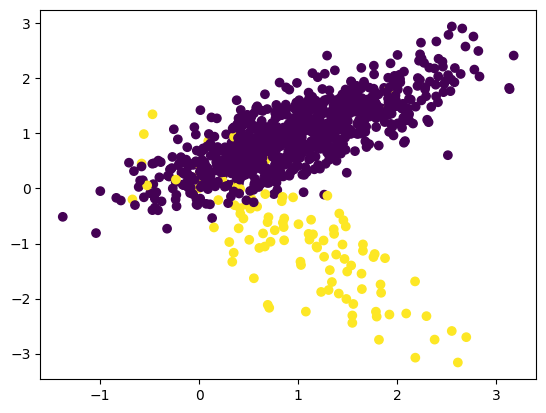

In [32]:
import matplotlib.pyplot as plt
plt.scatter(final_df['feature1'],final_df['feature2'],c=final_df['target'])
plt.show()

In [34]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_res,Y_res=smote.fit_resample(X,Y)
X_res
Y_res
pd.Series(Y_res).value_counts()


1    894
0    894
Name: count, dtype: int64